In [3]:
import numpy as np
import matplotlib.pyplot as plt
from treys.card import Card
from treys.deck import Deck
from treys.evaluator import Evaluator
import random
import tqdm

In [18]:
ranks = "23456789TJQKA"
suits = "cdhs"
deck = [f"{rank}{suit}" for rank in ranks for suit in suits]
evaluator = Evaluator()

def new_deck():
    return deck[:]

def simulate(hand, num_player_sims=1000, num_sims=1000):
    my_cards = [Card.new(c) for c in hand]
    deck = new_deck()
    deck_indexes_no_comm = list(range(len(deck) - 2 - 5))
    for card in hand:
        deck.remove(card)

    points = []

    for _ in tqdm.trange(num_sims):
        random.shuffle(deck)
        community_cards = [Card.new(deck.pop()) for _ in range(5)]
        wins = 0
        for _ in range(num_player_sims):
            # Draw other player's cards without removing from deck.
            random.shuffle(deck_indexes_no_comm)
            other_player_cards = [Card.new(deck[i]) for i in deck_indexes_no_comm[:2]]
            my_hand = evaluator.evaluate(my_cards, community_cards)
            other_player_hand = evaluator.evaluate(other_player_cards, community_cards)
            wins += my_hand < other_player_hand
        hand_strength = wins / num_player_sims
        points.append(hand_strength)
        for card in community_cards:
            deck.append(Card.int_to_str(card))

    return points

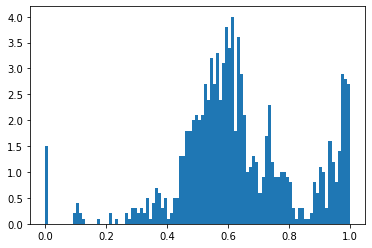

In [67]:

strengths = simulate(("6s", "6h",))
plt.hist(strengths, bins=100, density=True)
plt.show()

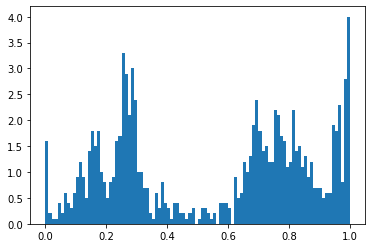

In [65]:
plt.hist(strengths, bins=100, density=True)
plt.show()

Try chi-square

In [53]:
def hand_strength(my_cards, community_cards):
    my_cards_lut = set(my_cards)
    my_cards = [Card.new(c) for c in my_cards]
    comm_card_lut = set(community_cards)
    community_cards = [Card.new(c) for c in community_cards]

    wins = 0
    total = 0

    # deck = new_deck()
    # for card in my_cards:
    #     deck.remove(card)
    # for card in community_cards:
    #     deck.remove(card)

    # my_cards = [Card.new(c) for c in my_cards]
    # community_cards = [Card.new(c) for c in community_cards]

    # for _ in range(1000):
    #     random.shuffle(deck)
    #     opp_card1_s = deck[0]
    #     opp_card2_s = deck[1]

    #     opp_cards = [Card.new(opp_card1_s), Card.new(opp_card2_s)]
    #     my_hand = evaluator.evaluate(my_cards, community_cards)
    #     opp_hand = evaluator.evaluate(opp_cards, community_cards)

    #     if my_hand < opp_hand:
    #         wins += 1
    #     total += 1

    for opp_card1 in range(52):
        opp_card1_s = deck[opp_card1]
        if opp_card1_s in my_cards_lut or opp_card1_s in comm_card_lut:
            continue
        for opp_card2 in range(opp_card1 + 1, 52):
            opp_card2_s = deck[opp_card2]
            if opp_card2_s in my_cards_lut or opp_card2_s in comm_card_lut:
                continue
            
            opp_cards = [Card.new(opp_card1_s), Card.new(opp_card2_s)]
            my_hand = evaluator.evaluate(my_cards, community_cards)
            opp_hand = evaluator.evaluate(opp_cards, community_cards)

            if my_hand < opp_hand:
                wins += 1
            total += 1

    return wins / total

def get_strengths(hand, num_sims=1000):
    deck = new_deck()
    for card in hand:
        deck.remove(card)

    rv = []
    
    for _ in tqdm.trange(num_sims):
        random.shuffle(deck)
        community_cards = deck[:5]
        strength = hand_strength(hand, community_cards)
        rv.append(strength)

    return rv



# Ks3h
# 2c4c5hAcAd
hand_strength(("Ks", "3h",), ("2c", "4c", "5h", "Ac", "Ad",))

# for _ in tqdm.trange(10000):
#     hand_strength(["Ah", "Qc"], ["7c", "8c", "9c", "Tc", "Jc"])

0.805050505050505

In [1]:
with open("../../build/dist.txt", "r") as f:
    dist = f.read().split("\n")
dist_vals = [float(line.strip()) for line in dist if line.strip()]

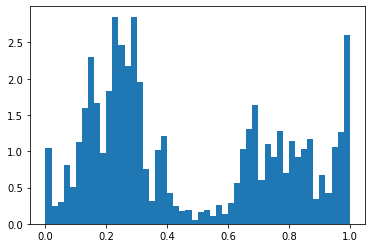

In [4]:
plt.hist(dist_vals, bins=50, density=True)
plt.show()

In [60]:
# strengths = simulate(("Ts", "Js",))
strengths = get_strengths(("Ts", "Js",))

100%|██████████| 1000/1000 [00:38<00:00, 25.97it/s]


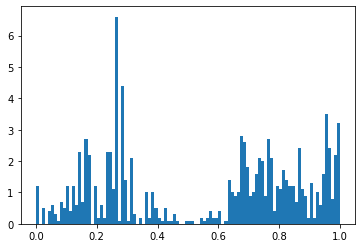

In [55]:
plt.hist(strengths, bins=100, density=True)
plt.show()

In [61]:
hand_strength(("Ts", "Js",), ("2c", "4c", "5h", "Ac", "Ad",))

0.1797979797979798